In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Begin by importing all necessary libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
#reading the train set
df_train = pd.read_csv('G:/Documents/DataScience/SA HD R performance of linear regression and k-nearest neighbour/S A Heart Disease.csv')

#reading the test set
#df_test = pd.read_csv('C:/Users/Ahriman/Desktop/Matlab House Price Predict/test.csv')

In [3]:
df_train

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [8]:
clearEntryData = df_train[["sbp","tobacco","ldl",'adiposity',"famhist","typea",'obesity','alcohol','age','chd']]

In [9]:
clearEntryData.head()


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [12]:
X = clearEntryData.iloc[:, :-1].values
y = clearEntryData.iloc[:, 9].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 12]
 [18 19]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        56
           1       0.61      0.51      0.56        37

    accuracy                           0.68        93
   macro avg       0.66      0.65      0.65        93
weighted avg       0.67      0.68      0.67        93



In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [19]:
error

[0.3010752688172043,
 0.3655913978494624,
 0.3010752688172043,
 0.3118279569892473,
 0.3225806451612903,
 0.34408602150537637,
 0.2903225806451613,
 0.2903225806451613,
 0.25806451612903225,
 0.27956989247311825,
 0.25806451612903225,
 0.24731182795698925,
 0.24731182795698925,
 0.27956989247311825,
 0.26881720430107525,
 0.27956989247311825,
 0.24731182795698925,
 0.25806451612903225,
 0.26881720430107525,
 0.26881720430107525,
 0.23655913978494625,
 0.25806451612903225,
 0.22580645161290322,
 0.25806451612903225,
 0.23655913978494625,
 0.26881720430107525,
 0.24731182795698925,
 0.24731182795698925,
 0.24731182795698925,
 0.26881720430107525,
 0.26881720430107525,
 0.2903225806451613,
 0.27956989247311825,
 0.3010752688172043,
 0.2903225806451613,
 0.3118279569892473,
 0.27956989247311825,
 0.3010752688172043,
 0.3118279569892473]

Text(0,0.5,'Mean Error')

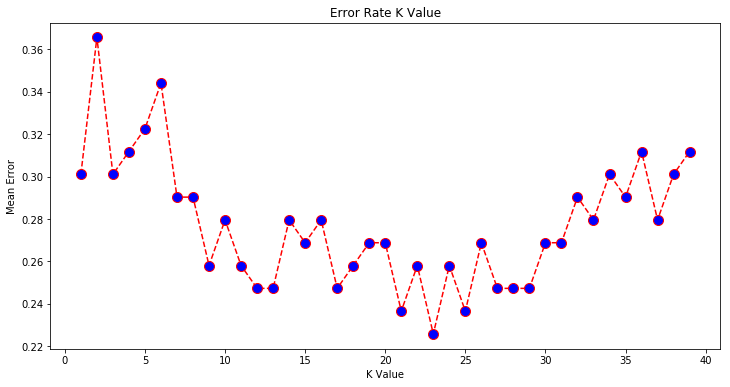

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [26]:
logreg_clf = LogisticRegression()


In [27]:
logreg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_LGR = logreg_clf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_LGR))
print(classification_report(y_test, y_pred_LGR))

[[49  7]
 [17 20]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        56
           1       0.74      0.54      0.62        37

    accuracy                           0.74        93
   macro avg       0.74      0.71      0.71        93
weighted avg       0.74      0.74      0.73        93



In [41]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#pca = PCA(n_components=2)
clf = LogisticRegression() 


pipe = Pipeline([ ('logistic', clf)])
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

In [42]:
predictions


array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1], dtype=int64)

In [45]:
error_LGR = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    logreg_clf = LogisticRegression()
    logreg_clf.fit(X_train, y_train)
    pred_i_LGR = logreg_clf.predict(X_test)
    error_LGR.append(np.mean(pred_i_LGR != y_test))

In [46]:
error_LGR


[0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225,
 0.25806451612903225]

Text(0,0.5,'Mean Error')

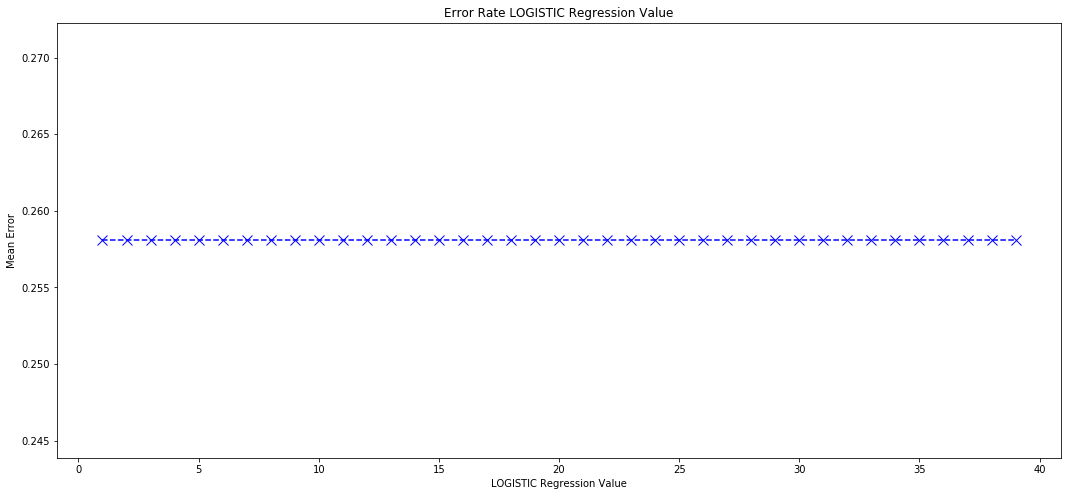

In [48]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, 40), error_LGR, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate LOGISTIC Regression Value')
plt.xlabel('LOGISTIC Regression Value')
plt.ylabel('Mean Error')